In [1]:
from __lib__ import  *
def find_contours(heatmap, threshold=None, dilation=True, erosion=False):
    """
    Find and sort text line contour based on score link image
    @Parameters:
        - heatmap: score link heatmap image
        - threshold: threshold method, choices=[otsu, adaptive, simple]
        - dilate: whether or not to use dilation
    @Returns:
        - contours: list of contours
        - contour_index: contour sort index
    """
    # Convert to grayscale
    gray = heatmap  # cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
    # gray = cv2.GaussianBlur(gray, (5,5), 0)
    height, width = gray.shape[:2]
    # Threshold
    thresh = gray
    if threshold == "otsu":
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    elif threshold == "adaptive":
        thresh = cv2.adaptiveThreshold(
            gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
        )
    elif threshold == "simple":
        # 180 -> 127
        thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

    # kernel = np.ones((3, 1), np.uint8)
    # thresh = cv2.erode(thresh, kernel, iterations=1)

    # Dilate
    dilate = thresh
    if dilation:
        # width // 50
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (width // 50, 1))
        dilate = cv2.dilate(thresh, kernel, iterations=3)

    # Erode
    erode = dilate
    if erosion:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
        erode = cv2.erode(dilate, kernel, iterations=1)

    # Find and sort contour
    contours = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    contours = [c.squeeze() for c in contours if len(c) > 2]

    contour_left = []
    for c in contours:
        index = np.argsort(c[:, 0])
        contour_left.append(c[index[0], 1])
    contour_index = np.argsort(contour_left)
    return contours, contour_index

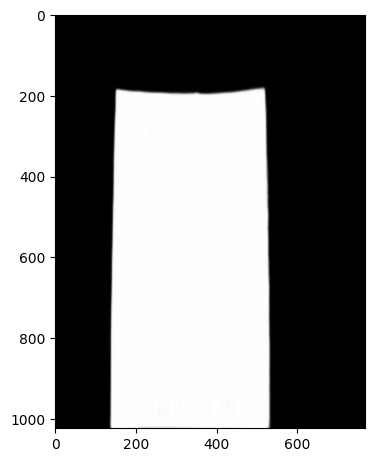

In [4]:
img = cv2.imread('/home/dtan/Documents/GCN/GCN_Vietnam/Code/U2Net/output/mcocr_private_145120kqech.jpg')
plt.figure(figsize=(4,10))
plt.imshow(img)